In [33]:
import pickle, os
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split
from math import sin, cos, sqrt, atan2, radians, asin
from sentence_transformers import SentenceTransformer

# Load Data

In [34]:
def compile_text(x):
    text =  f"""Card holder name: {x['Card holder name']},
                Email Address: {x['Email Address']},
                NIC: {x['NIC']},
                Phone number: {x['Phone number']},
                Address: {x['Address']},
                Sexual orientation: {x['Sexual orientation']},
                Political affiliation: {x['Political affiliation']},
                Union membership: {x['Union membership']},
                Race or ethnicity: {x['Race or ethnicity']},
            """
    return text

In [1]:
!pip install pandas

  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.4-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/10.8 MB 762.6 kB/s eta 0:00:15
   ---------------------------------------- 0.1/10.8 MB 819.2 kB/s eta 0:00:14
    --------------------------------------- 0.1/10.8 MB 774.0 kB/s eta 0:00:14
    --------------------------------------- 0.2/10.8 MB 841.6 kB/s eta 0:00:13
    --------------------------------------- 0.2/10.8 MB 731.4 kB/s eta 0:00:15
    --------------------------------------- 0.3/10.8 MB 785.2 kB/s eta 0:00:14
   - -------------------------------------- 0.3/10.8 MB 824.9 kB/s eta 0:00:13
   - -------------------------------------- 0.3/10.8 MB 846.5 kB/s eta 0:00:13
   - -------------------------------------- 0.3/10.8 MB 846.5 kB/s eta 0:00:13
   - ----

In [40]:
df = pd.read_csv("/Data.csv")
df = df[[
        'Card holder name',
        'Email Address',
        'NIC',
        'Phone number',
        'Address',
        'Sexual orientation',
        'Political affiliation',
        'Union membership',
        'Race or ethnicity',
        'Flag'
        ]]
df['Flag'] = df['Flag'].apply(lambda x: 1 if x is True else 0)
sentences = df.apply(lambda x: compile_text(x), axis=1).tolist()

model = SentenceTransformer(r"sentence-transformers/paraphrase-MiniLM-L6-v2")
output = model.encode(
                    sentences=sentences,
                    show_progress_bar=True,
                    normalize_embeddings=True
                    )

df_embedding = pd.DataFrame(output)
df_embedding

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.035157,-0.051130,-0.040373,0.092941,-0.020457,0.072078,0.051240,0.020846,0.015288,0.025894,...,-0.090817,-0.047236,0.018644,0.075729,-0.007342,-0.035205,-0.008746,-0.087930,-0.039284,0.073350
1,0.007250,0.010578,-0.029584,0.010424,-0.038510,0.069235,0.014202,0.005524,0.008029,-0.021284,...,-0.065812,-0.029553,0.044967,0.026945,-0.003902,-0.095691,-0.028988,-0.104652,-0.056925,0.009982
2,-0.044280,0.054482,-0.050004,0.078904,-0.019508,0.081281,0.018023,0.042611,0.049316,-0.060261,...,-0.047863,-0.017938,0.046112,0.046609,0.021043,-0.064316,-0.011710,-0.111359,-0.030365,-0.001305
3,-0.070963,0.049410,-0.024821,0.034112,-0.028482,0.063527,0.070658,0.055687,0.081769,-0.000547,...,-0.054907,-0.014848,0.042488,0.017819,-0.084100,-0.019751,-0.009267,-0.126219,-0.093881,0.007434
4,-0.057517,0.040983,-0.031159,0.064689,-0.033871,0.027741,-0.012842,0.076291,0.058580,-0.009405,...,-0.060974,-0.059606,0.045745,0.065984,0.019458,-0.028518,0.012511,-0.076181,-0.086060,-0.008506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.020727,0.103289,-0.091767,0.012523,-0.044156,0.067978,-0.017317,0.034079,0.067184,0.027547,...,-0.097534,-0.033687,0.024285,0.051445,-0.040657,-0.007778,0.002284,-0.136313,-0.078319,0.035225
996,-0.037522,0.035867,-0.028796,0.012932,-0.040239,0.060989,0.007680,0.064769,0.074780,-0.001608,...,-0.069908,0.010162,0.053216,0.056957,-0.041490,-0.028948,0.028202,-0.112271,-0.041120,0.057778
997,0.016325,0.057456,-0.058935,-0.024192,0.001674,0.050210,-0.040354,0.045274,0.059710,0.015084,...,-0.093524,0.005053,0.033453,0.100927,0.019716,-0.051980,-0.039815,-0.079571,-0.051389,0.002425
998,-0.043445,0.058868,-0.092539,0.032821,-0.049376,0.057263,0.041587,0.045766,0.039972,0.009130,...,-0.089494,0.016811,-0.003468,0.051114,-0.033776,-0.014391,0.022311,-0.129706,-0.080311,0.007430


In [45]:
X, y = df_embedding, df['Flag']
X_train, X_test, y_train, y_test = train_test_split(df_embedding, df['Flag'], test_size=0.2, random_state=42)

print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)

Training data shape:  (800, 384)
Testing data shape:  (200, 384)


# Models

In [46]:
import seaborn as sns
from sklearn.svm import SVC
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
# Random Forest Classifier
rfc = RandomForestClassifier(
                            n_estimators=1000,
                            random_state=42
                            )
rfc.fit(X, y)
print("Random Forest Classifier Trained")

# XGBoost Classifier

xgb = XGBClassifier(
                    n_estimators=100,
                    random_state=42
                    )
xgb.fit(X, y)
print("XGBoost Classifier Trained")

# KNN Classifier

knn = KNeighborsClassifier(
                            n_neighbors=5,
                            metric='minkowski',
                            p=2
                            )
knn.fit(X, y)
print("KNN Classifier Trained")

Random Forest Classifier Trained
XGBoost Classifier Trained
KNN Classifier Trained


In [48]:
P_rfc = rfc.predict(X_test)
P_xgb = xgb.predict(X_test)
P_knn = knn.predict(X_test)

In [49]:
print("Classification Report - Random Forest Classifier")
print(classification_report(y_test, P_rfc))

print("\nClassification Report - XGBoost Classifier")
print(classification_report(y_test, P_xgb))

print("\nClassification Report - KNN Classifier")
print(classification_report(y_test, P_knn))

Classification Report - Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Classification Report - XGBoost Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Classification Report - KNN Classifier
              precision    recall  f1-score   support

           0       0.71      0.46      0.56        97
           1       0.62      0.83      0.71       103

    accuracy                           0.65      

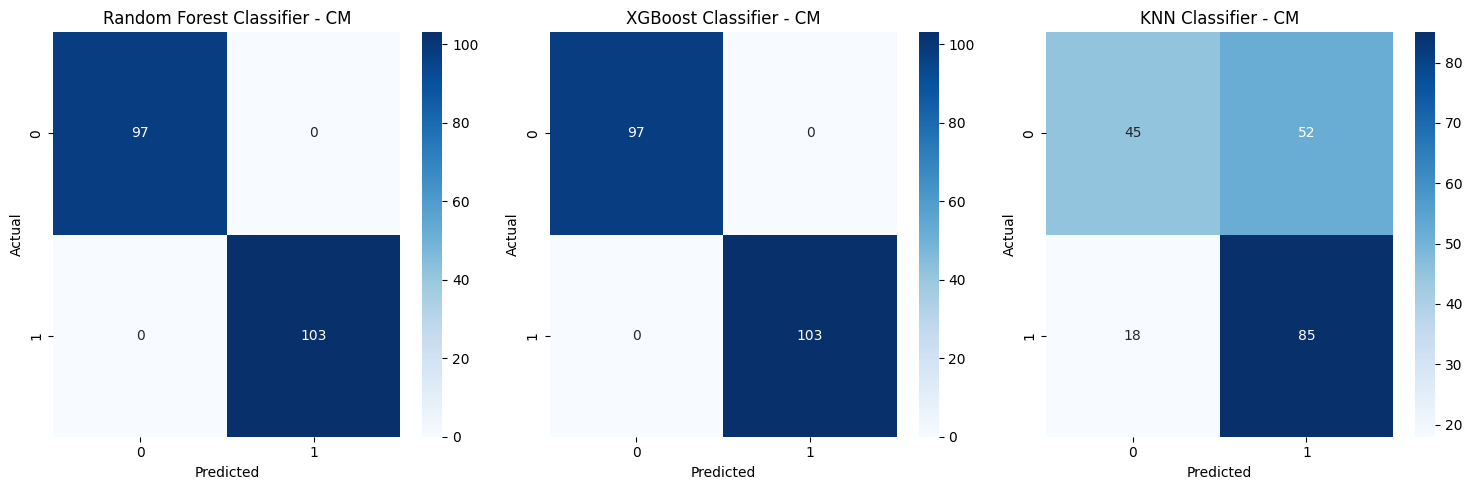

In [50]:
cm1 = confusion_matrix(y_test, P_rfc)
cm2 = confusion_matrix(y_test, P_xgb)
cm4 = confusion_matrix(y_test, P_knn)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Classifier - CM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Classifier - CM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 3)
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Classifier - CM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [51]:
# Save Random Forest Classifier
with open('/content/drive/MyDrive/Colab Notebooks/fraud-detection/weights/fraud-detection.pickle', 'wb') as f:
    pickle.dump(rfc, f)

# Inference

In [52]:
with open('/content/drive/MyDrive/Colab Notebooks/fraud-detection/weights/fraud-detection.pickle', 'rb') as f:
    rfc = pickle.load(f)

In [42]:
sample_json = {
                "Card holder name":"Florrie Anfrey",
                "Email Address":"fanfrey0@narod.ru",
                "NIC":"409230746v",
                "Phone number":"200 452 8260",
                "Address":"Khanu Woralaksaburi",
                "Sexual orientation":"Female",
                "Political affiliation":"Have",
                "Union membership":"Have not",
                "Race or ethnicity":"Tlingit-Haida"
                }

In [53]:
def inference_fraud(sample_json):
    sample = pd.DataFrame(sample_json, index=[0])
    sample['Text'] = sample.apply(lambda x: compile_text(x), axis=1)
    sample_embedding = model.encode(
                                    sentences=sample['Text'].tolist(),
                                    show_progress_bar=True,
                                    normalize_embeddings=True
                                    )
    sample_embedding = pd.DataFrame(sample_embedding)
    P = rfc.predict(sample_embedding)
    return P[0]

In [54]:
inference_fraud(sample_json)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0